In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import os

Mounted at /content/gdrive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import json
import glob
import ast
from tqdm.auto import tqdm


In [3]:
DATES = open("/content/gdrive/MyDrive/Colab/COMS6998EMODS/dates.txt").readlines()
DATES = [date.split("\n")[0] for date in DATES]

DIR = "/content/gdrive/MyDrive/Colab/COMS6998EMODS/pannel_data/Day_panel/"

cofficient = pd.DataFrame(columns=['date', 'positiveIncreaseRate', 'deathIncreaseRate', 'negativeIncreaseRate', 'hospitalizedIncreaseRate',\
                                    'totalTestResultsIncreaseRate', 'trumpNegRate', 'trumpPosRate'])

for date in tqdm(DATES):
  if date in ['2020-08-01', '2020-08-02', '2020-08-04', '2020-08-05', '2020-08-07']:
    continue

  dataset = pd.read_csv(DIR + date + ".csv", engine='python')

  dataset = dataset.replace([np.inf, -np.inf], np.nan).dropna(axis=0)


  X = dataset.iloc[:, 1:-1].values
  Y = dataset.iloc[:, -1].values


  # Create linear regression object
  regr = linear_model.LinearRegression()

  # Train the model using the training sets
  regr.fit(X, Y)
  
  row_value = [date] 
  for i in range(len(regr.coef_)):
    row_value.append(regr.coef_[i])
    
  
  tmp = pd.Series(row_value, index = cofficient.columns)

  cofficient = cofficient.append(tmp, ignore_index = True)
  # # Make predictions using the testing set
  # diabetes_y_pred = regr.predict(diabetes_X_test)

  # The coefficients
  # print("Coefficients: \n", regr.coef_)
  # The mean squared error
  # print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
  # # The coefficient of determination: 1 is perfect prediction
  # print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

cofficient
# cofficient.to_csv("/content/gdrive/MyDrive/Colab/COMS6998EMODS/Result/cofficient,csv", index=False)

  0%|          | 0/153 [00:00<?, ?it/s]

,date,positiveIncreaseRate,deathIncreaseRate,negativeIncreaseRate,hospitalizedIncreaseRate,totalTestResultsIncreaseRate,trumpNegRate,trumpPosRate
0,2020-08-03,-0.558816,0.233633,1.696849,0.949966,0.193795,0.000000e+00,0.000000e+00
1,2020-08-06,3.610768,-0.169991,-0.106944,-0.261990,-2.086854,0.000000e+00,6.892965e-32
2,2020-08-08,1.660872,-0.249669,-2.012290,-1.390812,-0.570183,0.000000e+00,-6.654361e-31
3,2020-08-09,0.038838,0.192595,0.795275,0.120134,0.247885,8.921783e-32,-1.087820e-31
4,2020-08-10,2.586750,-0.253653,1.744973,0.387696,-2.253766,8.338242e-33,0.000000e+00
...,...,...,...,...,...,...,...,...
143,2020-12-27,0.175570,-0.025835,-0.469060,0.155037,1.720731,0.000000e+00,0.000000e+00
144,2020-12-28,0.523310,0.357269,-0.622618,-2.212695,-0.190256,0.000000e+00,-2.139551e-30
145,2020-12-29,-0.557237,-0.235868,-0.319266,0.164405,0.720791,-8.205214e-32,-2.840888e-32
146,2020-12-30,0.352048,-0.012669,-0.493690,-0.939832,-0.215604,0.000000e+00,0.000000e+00


In [ ]:
std_c = cofficient['positiveIncreaseRate'].std()
avg_c = cofficient['positiveIncreaseRate'].abs().mean()
score_c = avg_c/std_c

std_d = cofficient['deathIncreaseRate'].std()
avg_d = cofficient['deathIncreaseRate'].abs().mean()
score_d = avg_d/std_d

std_n = cofficient['negativeIncreaseRate'].std()
avg_n = cofficient['negativeIncreaseRate'].abs().mean()
score_n = avg_n/std_n

std_h = cofficient['hospitalizedIncreaseRate'].std()
avg_h = cofficient['hospitalizedIncreaseRate'].abs().mean()
score_h = avg_h/std_h

std_t = cofficient['totalTestResultsIncreaseRate'].std()
avg_t = cofficient['totalTestResultsIncreaseRate'].abs().mean()
score_t = avg_t/std_t

std_p = cofficient['trumpPosRate'].std()
avg_p = cofficient['trumpPosRate'].abs().mean()
score_p = avg_p/std_p

std_neg = cofficient['trumpNegRate'].std()
avg_neg = cofficient['trumpNegRate'].abs().mean()
score_neg = avg_neg/std_neg

print("Stable Scores of Factor:")
print(score_c, score_d, score_n, score_h, score_t, score_p, score_neg)





Stable Scores of Factor:
0.5220745381132533 0.6265623191048784 0.5181761936830609 0.4905345402043205 0.5660073370033143 0.16912503166570877 0.1422513610970326


In [ ]:
!pip install xgboost

In [13]:
### XGB 
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from xgboost import XGBRegressor

HOME_DIR = '/content/gdrive/MyDrive/Colab/COMS6998EMODS/pannel_data/Day_panel/*'

FILES = glob.glob(HOME_DIR)

data = pd.DataFrame(columns=['state', 'positiveIncreaseRate', 'deathIncreaseRate', 'negativeIncreaseRate', 'hospitalizedIncreaseRate',\
                                    'totalTestResultsIncreaseRate', 'trumpNegRate', 'trumpPosRate', 'hateSpeechRate'])

for pfile in FILES:
  df = pd.read_csv(pfile)
  data = data.append(df, ignore_index=True)

data = data.drop(columns=['hospitalizedIncreaseRate'])

X, Y = data.iloc[:,1:-1],data.iloc[:,-1]


data_dmatrix = xgb.DMatrix(data=X,label=Y)

error = 100

# for i in tqdm(range(5)):
#   c = i * 0.05 + 0.1
#   for j in range(15):
#     l = 0.02 * j + 0.01
#     for m in range(10):
#       d = m + 5
#       for n in range(5):
#         a = n + 8
#         params = {"objective":"reg:squarederror",'colsample_bytree': c,'learning_rate': l,
#                       'max_depth': d, 'alpha': a}

#         xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=20)

#         cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
#                             num_boost_round=25,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

#         v = float(cv_results["test-rmse-mean"].tail(1).values)
#         if error > v:
#           error = v
#           colsample_bytree = c
#           learning_rate = l
#           max_depth = d
#           alpha = a
# print(error, colsample_bytree, learning_rate, max_depth, alpha)



In [ ]:
print(error, colsample_bytree, learning_rate, max_depth, alpha)


91.86096966666668 0.1 0.23 12 11


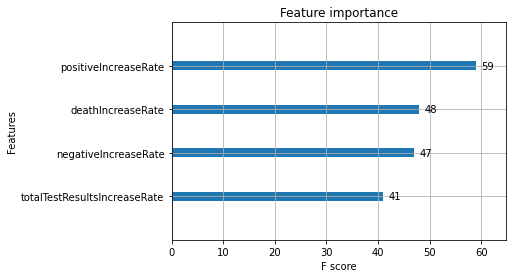

In [ ]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.2,
                      'max_depth': 3, 'alpha': 10}

xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=30)

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 15]
plt.show()

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [400, 200]
plt.show()

In [ ]:
!pip install shap

Text(0.5, 0, 'Random Forest Feature Importance')

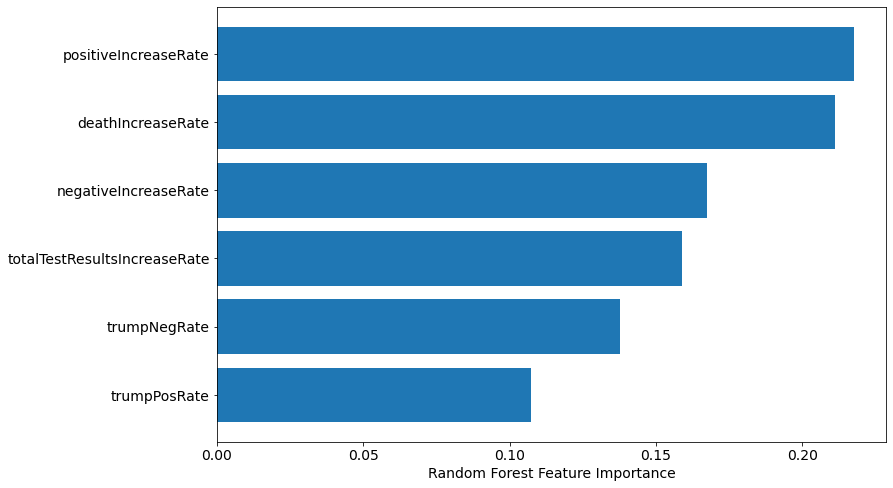

In [20]:
### Random forest

import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

rf = RandomForestRegressor(n_estimators=500, random_state=4, n_jobs=-1)

X.replace([np.inf, -np.inf], 0, inplace=True)

rf.fit(X, Y)
rf.feature_importances_.argsort()




sorted_idx = rf.feature_importances_.argsort()
name = ['trumpPosRate' , 'trumpNegRate', 'totalTestResultsIncreaseRate',  'negativeIncreaseRate', 'deathIncreaseRate', 'positiveIncreaseRate']

plt.barh(name, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
data

,state,positiveIncreaseRate,deathIncreaseRate,negativeIncreaseRate,hospitalizedIncreaseRate,totalTestResultsIncreaseRate,trumpNegRate,trumpPosRate,hateSpeechRate
0,AZ,-14.958775,-19.540230,-29.539683,92.075472,3.998234,42.039417,-37.847641,-33.333333
1,CA,-0.698772,-17.821782,0.000000,0.000000,-12.175104,42.039417,-37.847641,11.111111
2,FL,39.620206,-46.666667,39.221329,-10.272873,81.308354,42.039417,-37.847641,-25.000000
3,GA,-15.484728,-33.333333,0.000000,-40.883978,-18.090485,42.039417,-37.847641,-20.000000
4,IL,11.028994,-25.000000,0.000000,0.000000,-10.675409,42.039417,-37.847641,171.428571
...,...,...,...,...,...,...,...,...,...
1623,NY,31.588133,300.000000,0.000000,0.000000,44.030247,13.289874,7.590263,21.739130
1624,OH,-19.976636,50.000000,0.000000,25.000000,-11.308085,13.289874,7.590263,133.333333
1625,PA,256.410256,-17.391304,21.313143,0.000000,38.713636,13.289874,7.590263,66.666667
1626,TX,80.858622,220.833333,0.000000,0.000000,274.391563,13.289874,7.590263,76.923077
